## Natural Language Processing

We will be using the venturebeat data that we have scrapped and stored. We will begin with loading the data, inspecting it and then convert text into numeric features. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('venturebeat2020.csv')
print(df.shape)
df.head()

(1961, 4)


url category  \
0  https://venturebeat.com/2020/03/20/despite-set...       AI   
1  https://venturebeat.com/2020/03/19/sensor-towe...    Games   
2  https://venturebeat.com/2020/03/19/microsoft-u...    Games   
3  https://venturebeat.com/2020/03/19/sea-of-star...    Games   
4  https://venturebeat.com/2020/03/19/htc-holds-v...    AR/VR   

                                               title  \
0  Despite setbacks, coronavirus could hasten the...   
1  Sensor Tower: U.S. iPhone users spent about $5...   
2  Microsoft unveils DirectX 12 Ultimate with imp...   
3  Sea of Stars is a gorgeous retro-RPG from The ...   
4  HTC holds virtual media event, sends coronavir...   

                                                text  
0  This week, nearly every major company developi...  
1  U.S. iPhone users spent an average of about $5...  
2  Microsoft is moving on to the next generation ...  
3  Sabotage Studios announced Sea of Stars today,...  
4  HTC’s just-concluded Virtual Vive Ecosystem Co...

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   url       1961 non-null   object
 1   category  1961 non-null   object
 2   title     1961 non-null   object
 3   text      1961 non-null   object
dtypes: object(4)
memory usage: 61.4+ KB


Our task/problem here is to build a natural language processing model that can take the information of the article and determine the topic it belongs to. 

In [4]:
data = df.copy()

### 1. Data Preprocessing

We can extract date, month and day from the url using regular expression and datatime functionalities. We can also add a length and nwords column that represent the number of characters and the number of words in the article text, respectively. 

In [5]:
import re

In [6]:
def extract_date(string):
    match = re.search(r'\d{4}/\d{1,2}/\d{1,2}', str(string))
    return match.group() 

In [7]:
data['date'] = pd.to_datetime(data['url'].apply(extract_date))
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

data['length'] = data['text'].str.len()
data['nwords'] = data['text'].str.split().str.len()
data.head()

url category  \
0  https://venturebeat.com/2020/03/20/despite-set...       AI   
1  https://venturebeat.com/2020/03/19/sensor-towe...    Games   
2  https://venturebeat.com/2020/03/19/microsoft-u...    Games   
3  https://venturebeat.com/2020/03/19/sea-of-star...    Games   
4  https://venturebeat.com/2020/03/19/htc-holds-v...    AR/VR   

                                               title  \
0  Despite setbacks, coronavirus could hasten the...   
1  Sensor Tower: U.S. iPhone users spent about $5...   
2  Microsoft unveils DirectX 12 Ultimate with imp...   
3  Sea of Stars is a gorgeous retro-RPG from The ...   
4  HTC holds virtual media event, sends coronavir...   

                                                text       date  month  day  \
0  This week, nearly every major company developi... 2020-03-20      3   20   
1  U.S. iPhone users spent an average of about $5... 2020-03-19      3   19   
2  Microsoft is moving on to the next generation ... 2020-03-19      3   19   
3  Sabotage Studios announced Sea of Stars today,... 2020-03-19      3   19   
4  HTC’s just-concluded Virtual Vive Ecosystem Co... 2020-03-19      3   19   

   length  nwords  
0    6466    1011  
1    1136     200  
2    4731     783  
3     898     156  
4    4030     649

__Lexical diversity__ is one aspect of 'lexical richness' and refers to the ratio of different unique words to the total number of words. 

In [8]:
def lexical_diversity(text):
    return len( set(text) ) / len( text.split() )

data['text'] = data['text'].astype(str)
data['lex_div'] = data['text'].apply(lexical_diversity)
data.head()

url category  \
0  https://venturebeat.com/2020/03/20/despite-set...       AI   
1  https://venturebeat.com/2020/03/19/sensor-towe...    Games   
2  https://venturebeat.com/2020/03/19/microsoft-u...    Games   
3  https://venturebeat.com/2020/03/19/sea-of-star...    Games   
4  https://venturebeat.com/2020/03/19/htc-holds-v...    AR/VR   

                                               title  \
0  Despite setbacks, coronavirus could hasten the...   
1  Sensor Tower: U.S. iPhone users spent about $5...   
2  Microsoft unveils DirectX 12 Ultimate with imp...   
3  Sea of Stars is a gorgeous retro-RPG from The ...   
4  HTC holds virtual media event, sends coronavir...   

                                                text       date  month  day  \
0  This week, nearly every major company developi... 2020-03-20      3   20   
1  U.S. iPhone users spent an average of about $5... 2020-03-19      3   19   
2  Microsoft is moving on to the next generation ... 2020-03-19      3   19   
3  Sabotage Studios announced Sea of Stars today,... 2020-03-19      3   19   
4  HTC’s just-concluded Virtual Vive Ecosystem Co... 2020-03-19      3   19   

   length  nwords   lex_div  
0    6466    1011  0.070227  
1    1136     200  0.290000  
2    4731     783  0.067688  
3     898     156  0.352564  
4    4030     649  0.090909

In [9]:
corpus = data['text'].values.tolist()
print(len(corpus))

1961


### 1a. Tokenization

Tokenization is the process of splitting text into meaningul elements called tokens.

In [10]:
import nltk
nltk.download('popular', quiet=True)
from nltk import word_tokenize, wordpunct_tokenize

In [11]:
example = "I haven't watched the show at the theatre."
tokenized = nltk.word_tokenize(example)
print(tokenized)

['I', 'have', "n't", 'watched', 'the', 'show', 'at', 'the', 'theatre', '.']


In [12]:
example.split()

['I', "haven't", 'watched', 'the', 'show', 'at', 'the', 'theatre.']

In [13]:
print( wordpunct_tokenize(example) )

['I', 'haven', "'", 't', 'watched', 'the', 'show', 'at', 'the', 'theatre', '.']


The simplest vector encoding model is to simply fill in the vector with the frequency of each word as it appears in the document. 

### 1b. Stopwords

In [14]:
from nltk.corpus import stopwords

In [15]:
def is_stopword(token):
    stops  = set(stopwords.words('english'))
    return token.lower() in stops

print(tokenized)
print( [ is_stopword(i) for i in tokenized])

['I', 'have', "n't", 'watched', 'the', 'show', 'at', 'the', 'theatre', '.']
[True, True, False, False, True, False, True, True, False, False]


In [16]:
print(example.split() )
print( [ is_stopword(i) for i in example.split()])

['I', "haven't", 'watched', 'the', 'show', 'at', 'the', 'theatre.']
[True, True, False, True, False, True, True, False]


### 1c. Punctuations

In [17]:
import unicodedata
def is_punct(token):
    return all(unicodedata.category(char).startswith('P') for char in token)

print(tokenized)
print( [ is_punct(i) for i in tokenized])

['I', 'have', "n't", 'watched', 'the', 'show', 'at', 'the', 'theatre', '.']
[False, False, False, False, False, False, False, False, False, True]


In [18]:
print( wordpunct_tokenize(example) ) 
print( [ is_punct(i) for i in wordpunct_tokenize(example)] )

['I', 'haven', "'", 't', 'watched', 'the', 'show', 'at', 'the', 'theatre', '.']
[False, False, True, False, False, False, False, False, False, False, True]


### 1d. Stemming

In [19]:
from nltk.stem import SnowballStemmer

In [20]:
stemmer = SnowballStemmer('english')
stemmed = [ stemmer.stem(token) for token in tokenized ]
print( [example] )
print(tokenized)
print(stemmed)

["I haven't watched the show at the theatre."]
['I', 'have', "n't", 'watched', 'the', 'show', 'at', 'the', 'theatre', '.']
['i', 'have', "n't", 'watch', 'the', 'show', 'at', 'the', 'theatr', '.']


In [21]:
def normalizer(text):
    stem = nltk.stem.SnowballStemmer('english')
    text = text.lower()
    
    tokenized = []
    for token in nltk.word_tokenize(text):
        tokenized.append(stem.stem(token))
    
    tokenized = [token for token in tokenized 
                 if not is_punct(token)            # remove tokens that are punctuations
                 and not is_stopword(token)        # remove stopwords
                 and token.isascii()               # remove non-english characters
               ]
            
    return ' '.join(tokenized)                     # join b/c we are inputting a list

In [22]:
print( example )
print( '---> ' + normalizer(example) )

I haven't watched the show at the theatre.
---> n't watch show theatr


In [29]:
norm_corpus = [ normalizer(i) for i in corpus ]
print(corpus[0][:999])
norm_corpus[0][:999]

This week, nearly every major company developing autonomous vehicles in the U.S. halted testing in an effort to stem the spread of COVID-19, which has sickened more than 250,000 people and killed over 10,000 around the world. Still some experts argue pandemics like COVID-19 should hasten the adoption of driverless vehicles for passenger pickup, transportation of goods, and more. Autonomous vehicles still require disinfection — which companies like Alphabet’s Waymo and KiwiBot are conducting manually with sanitation teams — but in some cases, self-driving cars and delivery robots might minimize the risk of spreading disease. In a climate of social distancing, when on-demand services from Instacart to GrubHub have taken steps to minimize human contact, one factor in driverless cars’ favor is that they don’t require a potentially sick person behind the wheel. Tellingly, on Monday, when Waymo grounded its commercial robotaxis with human safety drivers, it initially said it would continue 


'week near everi major compani develop autonom vehicl u.s. halt test effort stem spread covid-19 sicken 250,000 peopl kill 10,000 around world still expert argu pandem like covid-19 hasten adopt driverless vehicl passeng pickup transport good autonom vehicl still requir disinfect compani like alphabet waymo kiwibot conduct manual sanit team case self-driv car deliveri robot might minim risk spread diseas climat social distanc on-demand servic instacart grubhub taken step minim human contact one factor driverless car favor requir potenti sick person behind wheel tell monday waymo ground commerci robotaxi human safeti driver initi said would continu oper driverless autonom car fleet peopl understand theori autonom vehicl reduc spread infect allow social distanc said amit nisenbaum ceo tactil mobil provid tactil data sens technolog allow autonom vehicl detect road bump curvatur hazard compani build fleet autonom vehicl develop solut guidelin general mainten clean steril keep strict clean 

### 1e. Lemmatization

In [23]:
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn

In [24]:
def is_punct(token):
    return all(unicodedata.category(char).startswith('P') for char in token)

def lemmatizer(token, postag):
    lemm = WordNetLemmatizer()
    tag= {
        'N':wn.NOUN,
        'V':wn.VERB,
        'R':wn.ADV,
        'J':wn.ADJ
    }.get(postag[0], wn.NOUN)
    
    return lemm.lemmatize(token, tag)

def normalizer_lemm(text):
    
    tagged_tokenized = pos_tag(wordpunct_tokenize(text))
    
    tokenized = [ lemmatizer(token, tag).lower() 
                 for (token, tag) in tagged_tokenized
                 if not is_punct(token) 
                 and token.isascii()
                ]
    
    # remove extended stopwords
    stop_words = stopwords.words('english')
    stop_words.extend(['game', 'compani'])
    stops = set(stop_words)
    tokenized = [token for token in tokenized if not token in stops]
    
    return ' '.join(tokenized)                     # join b/c we are inputting a list

In [30]:
normlemm_corpus = [ normalizer_lemm(i) for i in corpus ]
normlemm_corpus[0][:999]

'week nearly every major company develop autonomous vehicle u halt test effort stem spread covid 19 sicken 250 000 people kill 10 000 around world still expert argue pandemic like covid 19 hasten adoption driverless vehicle passenger pickup transportation good autonomous vehicle still require disinfection company like alphabet waymo kiwibot conduct manually sanitation team case self drive car delivery robot might minimize risk spread disease climate social distancing demand service instacart grubhub take step minimize human contact one factor driverless car favor require potentially sick person behind wheel tellingly monday waymo ground commercial robotaxis human safety driver initially say would continue operate driverless autonomous car fleet people understand theory autonomous vehicle reduce spread infection allow social distancing say amit nisenbaum ceo tactile mobility provider tactile data sense technology allow autonomous vehicle detect road bump curvature hazard companies build

## 2. Feature Extraction: Vectorization

The simplest vector encoding model is to simply fill in the vector with the frequency of each word as it appears in the document.

In [25]:
from collections import defaultdict

In [26]:
words = defaultdict(int)
for token in word_tokenize(example):
    words[token] += 1
words 

defaultdict(int,
            {'I': 1,
             'have': 1,
             "n't": 1,
             'watched': 1,
             'the': 2,
             'show': 1,
             'at': 1,
             'theatre': 1,
             '.': 1})

 ### 2a. Count Vectorizer 
 
 Scikit-Learn has a CountVectorizer transformer which does this for us easily. 

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
vectorizer = CountVectorizer()
vector = vectorizer.fit_transform(norm_corpus)
vector

<1961x27030 sparse matrix of type '<class 'numpy.int64'>'
	with 485489 stored elements in Compressed Sparse Row format>

In [32]:
vector.toarray()

array([[0, 5, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
features = vectorizer.get_feature_names()
nfeatures = len(features)
print(nfeatures)

27030


In [34]:
vocab = vectorizer.vocabulary_
vocab

{'week': 26168,
 'near': 16403,
 'everi': 8893,
 'major': 14831,
 'compani': 5902,
 'develop': 7347,
 'autonom': 3174,
 'vehicl': 25535,
 'halt': 11092,
 'test': 23835,
 'effort': 8285,
 'stem': 22765,
 'spread': 22559,
 'covid': 6368,
 '19': 323,
 'sicken': 21748,
 '250': 707,
 '000': 1,
 'peopl': 18033,
 'kill': 13483,
 '10': 72,
 'around': 2866,
 'world': 26507,
 'still': 22810,
 'expert': 9009,
 'argu': 2820,
 'pandem': 17726,
 'like': 14279,
 'hasten': 11235,
 'adopt': 1956,
 'driverless': 7962,
 'passeng': 17854,
 'pickup': 18260,
 'transport': 24421,
 'good': 10645,
 'requir': 20150,
 'disinfect': 7596,
 'alphabet': 2320,
 'waymo': 26106,
 'kiwibot': 13558,
 'conduct': 6006,
 'manual': 14936,
 'sanit': 20913,
 'team': 23629,
 'case': 4900,
 'self': 21319,
 'driv': 7955,
 'car': 4799,
 'deliveri': 7172,
 'robot': 20505,
 'might': 15582,
 'minim': 15673,
 'risk': 20430,
 'diseas': 7574,
 'climat': 5570,
 'social': 22203,
 'distanc': 7654,
 'on': 17174,
 'demand': 7190,
 'servic': 

In [35]:
from yellowbrick.text.freqdist import FreqDistVisualizer

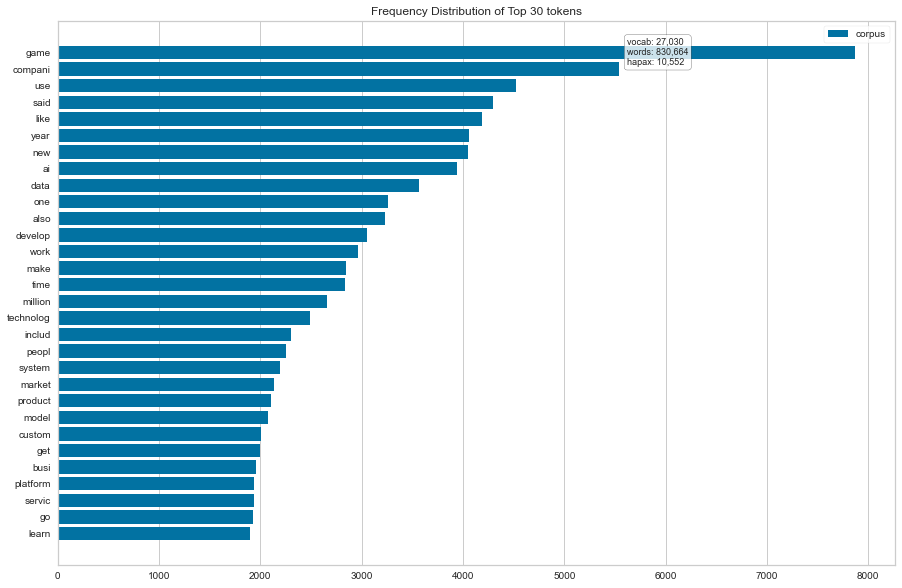

<AxesSubplot:title={'center':'Frequency Distribution of Top 30 tokens'}>

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
visualizer = FreqDistVisualizer(features=features, n=30, ax=ax )
visualizer.fit(vector)
visualizer.show()

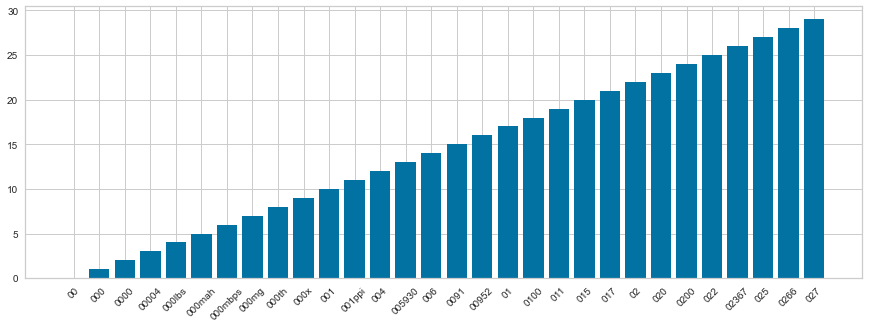

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
lists_asc = sorted(vocab.items())
x = [i for (i,j) in lists_asc]
y = [j for (i,j) in lists_asc]

n=30
plt.bar(x[:n], y[:n])
plt.xticks(rotation=45)
plt.show()

In [36]:
def normalizer(text):
    stem = nltk.stem.SnowballStemmer('english')
    text = text.lower()
    
    tokenized = []
    for token in nltk.word_tokenize(text):
        tokenized.append(stem.stem(token))
    
    tokenized = [token for token in tokenized 
                 if not is_punct(token)            # remove tokens that are punctuations
                 and token.isascii()               # remove non-english characters
               ]
    
    # remove extended stopwords
    stop_words = stopwords.words('english')
    stop_words.extend(['data','compani'])
    stops = set(stop_words)
    tokenized = [token for token in tokenized if not token in stops]
    
    return ' '.join(tokenized)                     # join b/c we are inputting a list

normalizer(example)

"n't watch show theatr"

In [38]:
norm_corpus = [ normalizer(i) for i in corpus ]

### 2b. TFIDF Vectorizer

Again, Scikit-learn has provided an easy to work with functin for this. There is also a "ngram_range" parameter, which will help to create vocabulary with one or phrases of two words or both. 

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
tfidf = TfidfVectorizer(analyzer='word')
tfidf_vector = tfidf.fit_transform(norm_corpus)
tfidf_vector

<1961x27030 sparse matrix of type '<class 'numpy.float64'>'
	with 485489 stored elements in Compressed Sparse Row format>

In [39]:
tfidf_vector.toarray()

array([[0.        , 0.07271827, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02555779, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

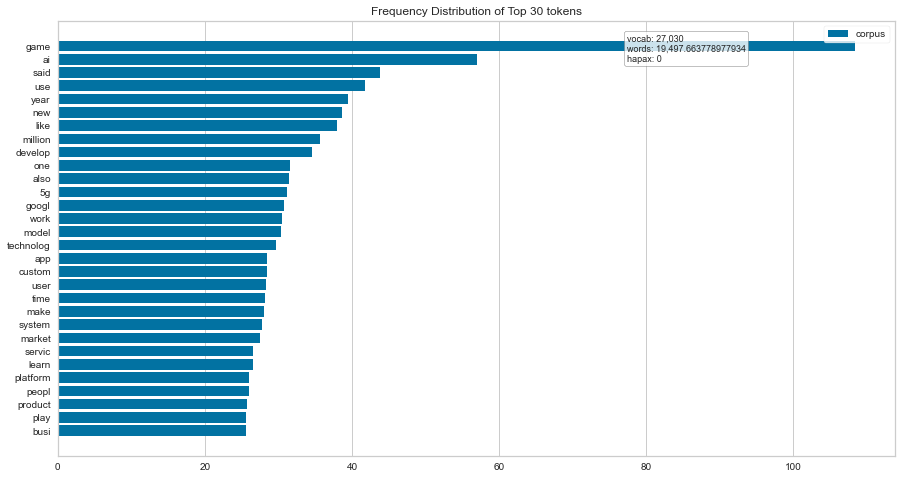

<AxesSubplot:title={'center':'Frequency Distribution of Top 30 tokens'}>

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
visualizer = FreqDistVisualizer(features=tfidf.get_feature_names(), n=30, ax=ax )
visualizer.fit(tfidf_vector)
visualizer.show()

## 3. MODELLING

In [40]:
X = pd.DataFrame(vector.toarray(), columns=features)
X

00  000  0000  00004  000lbs  000mah  000mbps  000mg  000th  000x  ...  \
0      0    5     0      0       0       0        0      0      0     0  ...   
1      0    0     0      0       0       0        0      0      0     0  ...   
2      0    0     0      0       0       0        0      0      0     0  ...   
3      0    0     0      0       0       0        0      0      0     0  ...   
4      0    0     0      0       0       0        0      0      0     0  ...   
...   ..  ...   ...    ...     ...     ...      ...    ...    ...   ...  ...   
1956   0    0     0      0       0       0        0      0      0     0  ...   
1957   0    3     0      0       0       0        0      0      0     0  ...   
1958   0    0     0      0       0       0        0      0      0     0  ...   
1959   0    1     0      0       0       0        0      0      0     0  ...   
1960   0    0     0      0       0       0        0      0      0     0  ...   

      zuo  zuora  zurich  zvi  zvonimir  zvox  zweig  zx  zych  zynga  
0       0      0       0    0         0     0      0   0     0      0  
1       0      0       0    0         0     0      0   0     0      0  
2       0      0       0    0         0     0      0   0     0      0  
3       0      0       0    0         0     0      0   0     0      0  
4       0      0       0    0         0     0      0   0     0      0  
...   ...    ...     ...  ...       ...   ...    ...  ..   ...    ...  
1956    0      0       0    0         0     0      0   0     0      0  
1957    0      0       0    0         0     0      0   0     0      0  
1958    0      0       0    0         0     0      0   0     0      0  
1959    0      0       0    0         0     0      0   0     0      0  
1960    0      0       0    0         0     0      0   0     0      0  

[1961 rows x 27030 columns]

In [41]:
cols = ['month','day','length','nwords','lex_div']
X = pd.concat([data[cols], X], axis=1)
print(X.shape)
X.head()

(1961, 27035)


month  day  length  nwords   lex_div  00  000  0000  00004  000lbs  ...  \
0      3   20    6466    1011  0.070227   0    5     0      0       0  ...   
1      3   19    1136     200  0.290000   0    0     0      0       0  ...   
2      3   19    4731     783  0.067688   0    0     0      0       0  ...   
3      3   19     898     156  0.352564   0    0     0      0       0  ...   
4      3   19    4030     649  0.090909   0    0     0      0       0  ...   

   zuo  zuora  zurich  zvi  zvonimir  zvox  zweig  zx  zych  zynga  
0    0      0       0    0         0     0      0   0     0      0  
1    0      0       0    0         0     0      0   0     0      0  
2    0      0       0    0         0     0      0   0     0      0  
3    0      0       0    0         0     0      0   0     0      0  
4    0      0       0    0         0     0      0   0     0      0  

[5 rows x 27035 columns]